# **Data Cleaning and Imputation**

---

Exploring and analyzing data often means dealing with missing values, incorrect data types, and outliers. In this chapter, you’ll learn techniques to handle these issues and streamline your EDA processes!

> what's EDA?
* exploratory data analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

planes_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/dataset/Exploratory_Data_Analysis_in_Python/planes.csv"
planes = pd.read_csv(planes_url)

planes

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,NaN,11:20,3h,non-stop,NaN,7229.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0


# **Addressing missing data**

**Big Question**

> Adress the learning target:

* what do we need to learn from Data Cleaning and imputation?
* what method did we use during the course?
* how to deal with missing data remained?
* how to replace remain missing data value?

## Exercise - **Dealing with missing data**

It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called `planes`, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.

**Instructions**

* Print the number of missing values in each column of the DataFrame.

* Calculate how many observations five percent of the `planes` DataFrame is equal to.

* Create `cols_to_drop` by applying boolean indexing to columns of the DataFrame with missing values less than or equal to the threshold.

* Use this filter to remove missing values and save the updated DataFrame.

In [2]:
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
# print(cols_to_drop)

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


 Result: By creating a missing values threshold and using it to filter columns, you've managed to remove missing values from all columns except for "`Additional_Info`" and "`Price`".

## Exercise - **Strategies for remaining missing data**

The five percent rule has worked nicely for your `planes` dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the "`Additional_Info`" and "`Price`" columns, which are missing `300` and `368` values respectively

You'll first take a look at what "`Additional_Info`" contains, then visualize the price of plane tickets by different airlines.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* Print the values and frequencies of "Additional_Info".

In [4]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


* Create a boxplot of `"Price"` versus `"Airline"`.

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


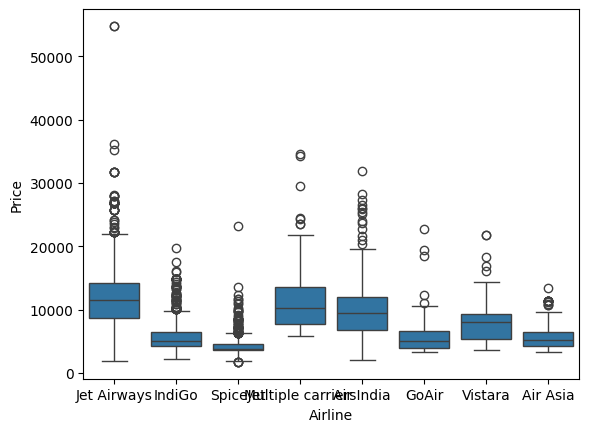

In [5]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

# Create a box plot of Price by Airline
sns.boxplot(data=planes, x='Airline', y='Price')

plt.show()

**Question**

* How should you deal with the missing values in "`Additional_Info`" and "`Price`"?

---

**Possible answers:**

**1. Remove the `"Additional_Info"` column and impute the mean for missing values of `"Price"`.**

> *It looks like price varies by `"Airline"`, so imputing the mean for `"Price"` would not represent the data.*

**2. Remove `"No info"` values from `"Additional_Info"` and impute the median for missing values of `"Price"`.**

> *If you remove all observations containing `"No info"` for `"Additional_Info"` it would drop over 7000 rows from the dataset!*

**3. Remove the `"Additional_Info"` column and impute the mean by `"Airline"` for missing values of `"Price"`.**

> *Remove the `"Additional_Info"` column and impute the mean by `"Airline"` for missing values of `"Price"`.*

**4. Remove the `"Additional_Info"` column and impute the median by `"Airline"` for missing values of `"Price"`.** ✅

In [6]:
# Save 'Additional_Info' column to a separate variable
additional_info = planes['Additional_Info'].copy()

In [7]:
# Remove the "Additional_Info" column
planes = planes.drop("Additional_Info", axis=1)

planes.info()

# # Impute the median by "Airline" for missing values of "Price"
# planes['Price'] = planes.groupby('Airline')['Price'].transform(lambda x: x.fillna(x.median()))


<class 'pandas.core.frame.DataFrame'>
Index: 8508 entries, 0 to 10659
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          8508 non-null   object 
 1   Date_of_Journey  8508 non-null   object 
 2   Source           8508 non-null   object 
 3   Destination      8508 non-null   object 
 4   Route            8508 non-null   object 
 5   Dep_Time         8508 non-null   object 
 6   Arrival_Time     8508 non-null   object 
 7   Duration         8508 non-null   object 
 8   Total_Stops      8508 non-null   object 
 9   Price            8140 non-null   float64
dtypes: float64(1), object(9)
memory usage: 731.2+ KB


**Result** : You don't need the `"Additional_Info"` column, and should impute median `"Price"` by `"Airline"` to accurately represent the data!

## Exercise - **Imputing missing plane prices**

Now there's just one column with missing values left!

You've removed the `"Additional_Info"` column from `planes` —the last step is to impute the missing data in the `"Price"` column of the dataset.

As a reminder, you generated this boxplot, which suggested that imputing the median price based on the `"Airline"` is a solid approach!
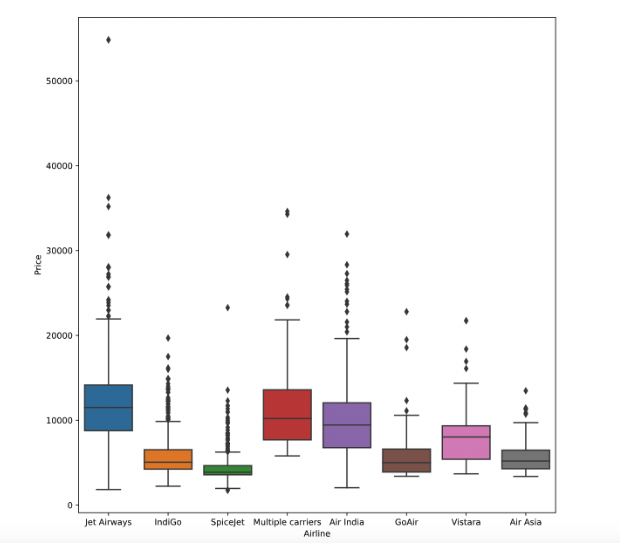

**Instructions**

* Group `planes` by airline and calculate the median price.

In [8]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


* Convert the grouped median prices to a dictionary.

In [9]:
# Convert to a dictionary
prices_dict = airline_prices.to_dict()
prices_dict

{'Air Asia': 5192.0,
 'Air India': 9443.0,
 'GoAir': 5003.5,
 'IndiGo': 5054.0,
 'Jet Airways': 11507.0,
 'Multiple carriers': 10197.0,
 'SpiceJet': 3873.0,
 'Vistara': 8028.0}

* Conditionally impute missing values for `"Price"` by mapping values in the `"Airline"` column based on `prices_dict`.

* Check for remaining missing values.

In [10]:
# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


**Result** : You converted a grouped DataFrame to a dictionary and then used it to conditionally fill missing values for "Price" based on the "Airline"! Now let's explore how to perform exploratory analysis on categorical data.

You learned about the importance of handling missing data in datasets to ensure accurate exploratory data analysis (EDA). Specifically, you discovered:

* **Why missing data matters** : Missing values can skew distributions and lead to incorrect conclusions. For example, omitting taller students in a height survey could falsely lower the average height.

* **Identifying missing data in pandas** : Using a dataset of data professionals, you practiced counting missing values with `.isna().sum()` in a pandas DataFrame, revealing insights into data completeness.
* **Strategies for addressing missing data** :
  
  * **Dropping observations** : If missing values constitute a small portion (≤5%) of the dataset, it's reasonable to remove these observations.

  * **Imputation** : Replacing missing values with summary statistics (mean, median, mode) or more sophisticated methods based on subgroup characteristics. For instance, imputing salaries by experience level to maintain accuracy in salary distributions.

You applied these concepts through exercises, including:

* Calculating a threshold to identify columns for dropping or imputation in a dataset.
* Using Boolean indexing to filter columns for dropping and then applying `.dropna()` to clean the dataset.
* Imputing missing values by replacing them with the mode for categorical data and median for numerical data, tailored by relevant subgroups (e.g., experience level for salaries).



```
# Example code snippet from the lesson
plane['Price'].fillna(plane.groupby('Airline')['Price'].transform('median'), inplace=True)
```



In [11]:
# planes['Price'].fillna(planes.groupby('Airline')['Price'].transform('median'), inplace=True)
# planes

# **Converting and analyzing categorical data**

## Exercise - **Finding the number of unique values**

You would like to practice some of the categorical data manipulation and analysis skills that you've just seen. To help identify which data could be reformatted to extract value, you are going to find out which non-numeric columns in the `planes` dataset have a large number of unique values.



In [12]:
planes.drop(columns=["Arrival_Time"], inplace=True)

In [13]:
planes['Additional_Info'] = additional_info

**Instructions**

* Filter `planes` for columns that are of `"object"` data type.
* Loop through the columns in the dataset.
* Add the column iterator to the print statement, then call the function to return the number of unique values in the column.

In [14]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes('object')

# Loop through columns
for col in non_numeric.columns:

  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5
Number of unique values in Additional_Info column:  9


**Result** : `"Duration" ` is currently an object column whereas it should be a numeric column, and has 362 unique values! Let's find out more about this column

### Code explan

1. Filtering for Object Columns:
```
non_numeric = planes.select_dtypes('object')
```
 * include only the columns that have a data type of `"object"` (text or string)
 * `select_dtypes` is a method filtering out all non-object columns by specifying `'object'`
2. Looping Through Columns:
```
for col in non_numeric.columns:
```
 * initiates a loop that iterates over each column in the non_numeric DataFrame.
 * By looping through `non_numeric` column names, we can perform operations on each column individually.


3. Printing the Number of Unique Values:
```
print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())
```
  * prints out the number of unique values for each column.
  * The `nunique()` function is called on each column `(non_numeric[col])` to calculate the number of distinct values present in that column.
  * The print statement is formatted to include the column name `({col})` and the result of `nunique()`

## Exercise - **Flight duration categories**

As you saw, there are 362 unique values in the `"Duration"` column of `planes`. Calling `planes["Duration"].head()`, we see the following values:

```
0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object
```

Looks like this won't be simple to convert to numbers. However, you could categorize flights by duration and examine the frequency of different flight lengths!

You'll create a `"Duration_Category"` column in the `planes` DataFrame. Before you can do this you'll need to create a list of the values you would like to insert into the DataFrame, followed by the existing values that these should be created from.

**Instructions 1/2**

* Create a list of categories containing `"Short-haul"`, `"Medium"`, and `"Long-haul"`.

In [15]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

**Instructions 2/2**

* Create `short_flights`, a string to capture values of `"0h", "1h", "2h", "3h", or "4h"` taking care to avoid values such as `"10h"`.
* Create `medium_flights` to capture any values between five and nine hours.
* Create `long_flights` to capture any values from 10 hours to 16 hours inclusive.

In [16]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short_flights
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium_flights
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long_flights
long_flights = "10h|11h|12h|13h|14h|15h|16h"

1. **short_flights:** The string short_flights is designed to capture flight durations that are exactly "0h", "1h", "2h", "3h", or "4h". The pattern ^0h|^1h|^2h|^3h|^4h uses the caret symbol ^ to indicate the start of the string, ensuring that only these specific values are matched. This prevents matching values like "10h", which would otherwise match "0h" if the caret were not used.

2. **medium_flights:** The string medium_flights captures flight durations between "5h" and "9h". The pattern ^5h|^6h|^7h|^8h|^9h similarly uses the caret symbol ^ to ensure that only these specific values are matched. This pattern effectively captures any flight duration that is exactly five to nine hours long.

3. **long_flights:** The string long_flights is designed to capture flight durations from "10h" to "16h" inclusive. The pattern 10h|11h|12h|13h|14h|15h|16h lists each possible value explicitly. Since these values are all two-digit numbers, there is no need for the caret symbol to prevent partial matches, as there are no shorter strings that could be mistakenly matched.

Overall, this solution uses regular expression patterns to precisely match the specified flight durations for each category, ensuring that only the intended values are captured.

**Result** :  Now you've created your categories and values, it's time to conditionally add the categories into the DataFrame.

## Exercise - **Adding duration categories**

Now that you've set up the categories and values you want to capture, it's time to build a new column to analyze the frequency of flights by duration!

The variables `flight_categories`, `short_flights`, `medium_flights`, and `long_flights` that you previously created are available to you.


**Instructions**

* Create conditions, a list containing subsets of `planes["Duration"]` based on `short_flights`, `medium_flights`, and `long_flights`.

* Create the `"Duration_Category"` column by calling a function that accepts your `conditions` list and `flight_categories`, setting values not found to `"Extreme duration"`.

* Create a plot showing the count of each category.

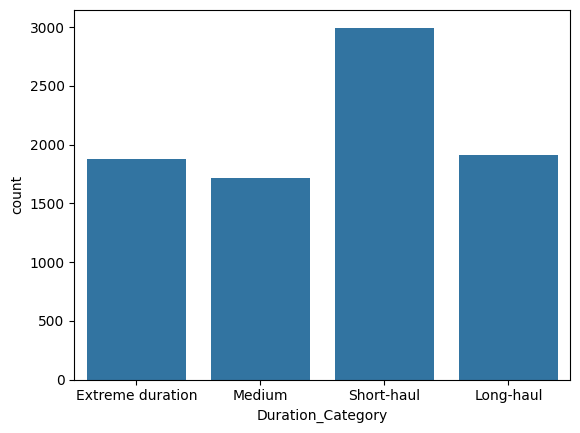

In [17]:
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions,
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

**Result** : Creative categorical transformation work! It's clear that the majority of flights are short-haul, and virtually none are longer than 16 hours! Now let's take a deep dive into working with numerical data.

### **Code Explanation**

Creating Conditions:

The conditions list is created by using the str.contains() method on the planes["Duration"] column. This method checks if each entry in the "Duration" column matches the specified regular expression patterns for short, medium, and long flights.
The short_flights, medium_flights, and long_flights variables contain regular expressions that match flight durations based on the number of hours. For example, short_flights matches durations from 0 to 4 hours, medium_flights matches 5 to 9 hours, and long_flights matches 10 to 16 hours.
Each condition in the list is a boolean array indicating whether each flight's duration matches the respective category.
Creating the "Duration_Category" Column:

The np.select() function is used to create a new column, "Duration_Category", in the planes DataFrame. This function takes the conditions list and the flight_categories list as arguments.
For each row in the DataFrame, np.select() checks the conditions in order. If a condition is True, it assigns the corresponding category from flight_categories to that row.
If none of the conditions are True for a particular row, the default value "Extreme duration" is assigned. This handles any durations that do not fit into the predefined categories.
Plotting the Count of Each Category:

The sns.countplot() function from the Seaborn library is used to create a bar plot showing the count of each category in the "Duration_Category" column.
The x parameter is set to "Duration_Category", which means the x-axis will display the different categories, and the y-axis will show the count of flights in each category.
Finally, plt.show() is called to display the plot.
This solution effectively categorizes flight durations into specified categories and visualizes the distribution of these categories, fulfilling the exercise requirements.

## **Your recent learnings**

You learned about converting and analyzing categorical data within a DataFrame, focusing on handling job titles in a dataset. Key points covered include:

* **Filtering Non-Numeric Data** : You discovered how to use `select_dtypes` to isolate non-numeric columns, such as job titles, from a DataFrame. This method helps in focusing on categorical data for analysis.
* **Analyzing Value Frequencies** : The `nunique` method was used to count unique job titles, revealing there were 50 different titles, with "Research Scientist" being a less common role.
* **String Manipulation for Data Filtering** : You learned to use the `str.contains` method to filter rows based on whether they contain certain keywords, such as "Scientist". This is useful for narrowing down data to specific categories of interest.
* **Combining Filters** : By using the pipe (`|`) symbol in `str.contains`, you combined filters to find job titles containing either "Machine Learning" or "AI", showcasing how to search for multiple conditions within a single column.
* **Creating New Categorical Columns** : You created a new column, `Job_Category`, by defining a list of job roles and using NumPy's `select` function to categorize each job title based on predefined conditions. This allows for a more organized analysis of job categories.



```
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions,
                                        flight_categories,
                                        default="Extreme duration")
```




# **Working with numeric data**

## Exercise - Flight duration

You would like to analyze the duration of flights, but unfortunately, the `"Duration"` column in the `planes` DataFrame currently contains string values.

You'll need to clean the column and convert it to the correct data type for analysis.

**Instructions**

* Print the first five values of the `"Duration"` column.

In [18]:
# Preview the column
print(planes['Duration'].head(5))

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


**In order to merge mins into hours**

In [19]:
import re

# If you need to add 'h' to the end of each entry in planes['Duration']:
# planes['Duration'] = planes['Duration'].astype(str) + "h"

def to_hours(time_str):
    # Look for an integer before an "h" and (optionally) an integer before an "m"
    match = re.match(r'(\d+)h(?:\s+(\d+)m)?', time_str)
    if match:
        hours = int(match.group(1))
        minutes = int(match.group(2)) if match.group(2) else 0
        return hours + minutes / 60
    # If no match is found, return NaN instead of None
    return np.nan  # Return NaN for non-matching values

planes['Duration'] = [str(to_hours(t)) + 'h' if to_hours(t) is not np.nan else np.nan for t in planes['Duration']]
# Handle NaN values in list comprehension
print(planes['Duration'])

0                      19.0h
1         5.416666666666667h
2                      4.75h
3        2.4166666666666665h
4                      15.5h
                ...         
10654    2.6666666666666665h
10655                   2.5h
10656    2.5833333333333335h
10658    2.6666666666666665h
10659     8.333333333333334h
Name: Duration, Length: 8508, dtype: object


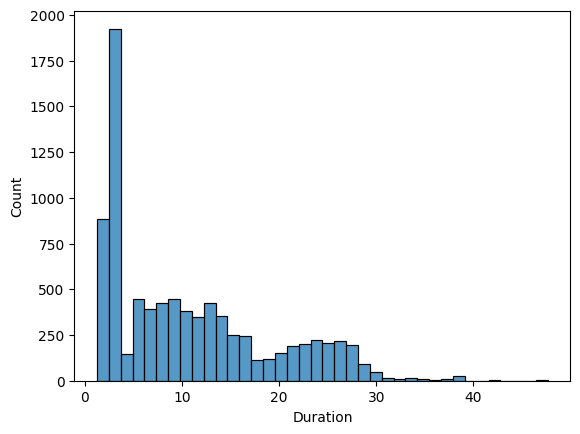

In [20]:
# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", "")

# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float)

# Plot a histogram
sns.histplot(data=planes, x= "Duration")
plt.show()

**Result** : Creative cleaning skills! Once the data was in the right format, you were able to plot the distribution of 'Duration' and see that the most common flight length is around three hours.

## Exercise - **Adding descriptive statistics**

Now `"Duration"` and `"Price"` both contain numeric values in the `planes` DataFrame, you would like to calculate summary statistics for them that are conditional on values in other columns.

**Instructions**

* Add a column to `planes` containing the standard deviation of `"Price"` based on `"Airline"`.

* Calculate the median for `"Duration"` by `"Airline"`, storing it as a column called `"airline_median_duration"`.

* Find the mean `"Price"` by `"Destination"`, saving it as a column called `"price_destination_mean"`.

In [21]:
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4159.846432             3082
IndiGo             2245.529140             1632
Air India          3692.609285             1399
Multiple carriers  3558.323763              959
SpiceJet           1798.900648              653
Vistara            2888.915498              376
Air Asia           1979.826234              260
GoAir              2764.926625              147
Name: count, dtype: int64


In [22]:
# Median Duration by Airline
planes["airline_median_duration"] = planes.groupby("Airline")["Duration"].transform(lambda x: x.median())

print(planes[["Airline","airline_median_duration"]].value_counts())

Airline            airline_median_duration
Jet Airways        13.333333                  3082
IndiGo             2.916667                   1632
Air India          15.708333                  1399
Multiple carriers  10.250000                   959
SpiceJet           2.500000                    653
Vistara            3.166667                    376
Air Asia           2.833333                    260
GoAir              2.916667                    147
Name: count, dtype: int64


In [23]:
# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10473.585927              3631
Banglore     9093.622872               2291
Delhi        5248.541082                998
New Delhi    11579.306944               720
Hyderabad    5190.274021                562
Kolkata      4907.156863                306
Name: count, dtype: int64


**Result** : Terrific transforming! Looks like Jet Airways has the largest standard deviation in price, Air India has the largest median duration, and New Delhi, on average, is the most expensive destination. Now let's look at how to handle outliers.



# **Handling outliers**